In [1]:
import gluon
import view_gluon

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.optimize as so

import utils
import gvar as gv

utils.set_mplstyle()

In [2]:
renorm_mu = -58
escale = 1.7606
Tc=167

XI = 3.453

In [3]:
def renorm(q,D_latt,D_tree):
    
    renorm_fit = lambda x,h: h*D_tree
    
    popt,pcov = so.curve_fit(renorm_fit,q,np.asarray([D.mean for D in D_latt]),sigma=np.asarray([D.sdev for D in D_latt]),absolute_sigma=True)
    
    return 1/gv.gvar(popt[0],np.sqrt(pcov[0][0]))

# Compare modes

In [5]:
Nt = 64
mode = "VOS"

In [6]:
for i in range(1,50):
    path = f"Gen2l_{Nt}x32n{i}-{mode}"
    #path = f"Gen2l_{Nt}x32n{i}"
    try:
        gluon.spatial(Nt, 1, mode, check_divA=True, rand_selection=[path], save_prop=True, regenerate=False, pattern='landau')
        pass
    except Exception as e:
        print(e)

No cached file found. Generating...
/home/ben/Work/gauge_confs/confs/vortex-only/64x32/Gen2l_64x32n1-VOS /home/ben/Work/gauge_confs/transforms/landau/vortex-only/64x32/Gen2l_64x32n1-VOS.gauge.lime
div.A: 1.0782977701546498e-16
Saving propagator...
No cached file found. Generating...
/home/ben/Work/gauge_confs/confs/vortex-only/64x32/Gen2l_64x32n2-VOS /home/ben/Work/gauge_confs/transforms/landau/vortex-only/64x32/Gen2l_64x32n2-VOS.gauge.lime
div.A: 1.0658195416881007e-16
Saving propagator...
No cached file found. Generating...
/home/ben/Work/gauge_confs/confs/vortex-only/64x32/Gen2l_64x32n3-VOS /home/ben/Work/gauge_confs/transforms/landau/vortex-only/64x32/Gen2l_64x32n3-VOS.gauge.lime
div.A: 1.0545549618066288e-16
Saving propagator...
No cached file found. Generating...
/home/ben/Work/gauge_confs/confs/vortex-only/64x32/Gen2l_64x32n4-VOS /home/ben/Work/gauge_confs/transforms/landau/vortex-only/64x32/Gen2l_64x32n4-VOS.gauge.lime
div.A: 1.0655279526434676e-16
Saving propagator...
No cache

No cached file found. Generating...
/home/ben/Work/gauge_confs/confs/vortex-only/64x32/Gen2l_64x32n38-VOS /home/ben/Work/gauge_confs/transforms/landau/vortex-only/64x32/Gen2l_64x32n38-VOS.gauge.lime
No such file: /home/ben/Work/gauge_confs/confs/vortex-only/64x32/Gen2l_64x32n38-VOS, /home/ben/Work/gauge_confs/confs/vortex-only/64x32/Gen2l_64x32n38-VOS.*
No cached file found. Generating...
/home/ben/Work/gauge_confs/confs/vortex-only/64x32/Gen2l_64x32n39-VOS /home/ben/Work/gauge_confs/transforms/landau/vortex-only/64x32/Gen2l_64x32n39-VOS.gauge.lime
No such file: /home/ben/Work/gauge_confs/confs/vortex-only/64x32/Gen2l_64x32n39-VOS, /home/ben/Work/gauge_confs/confs/vortex-only/64x32/Gen2l_64x32n39-VOS.*
No cached file found. Generating...
/home/ben/Work/gauge_confs/confs/vortex-only/64x32/Gen2l_64x32n40-VOS /home/ben/Work/gauge_confs/transforms/landau/vortex-only/64x32/Gen2l_64x32n40-VOS.gauge.lime
No such file: /home/ben/Work/gauge_confs/confs/vortex-only/64x32/Gen2l_64x32n40-VOS, /hom

In [11]:
results = {}

for mode in ["VOS"]: 
    prop = view_gluon.propagator(Nt,mode,n_samples=10,gtype="landau")
    print(Nt,len(prop.prop_info))
    q = prop.q
    D = prop.D
    
    # Z3 average
    qz3, Dz3, D4z3 = prop.Z3_average(q,D)
    
    # _,_ = prop.half_cut()
    
    prop.q = qz3
    prop.D = Dz3
    prop.D4 = D4z3
    
    qn = prop.norm_q()
    
    prop.q = qn
    
    # Cone cut
    qc, Dc, D4c = prop.cone_cut(radius=1)
    
    # Lattice momentum correction
    qi = prop.correct_q(qc,qtype="improved")
    
    # Renormalize
    #prop.renormalize(xi=3.453)
    
    results[mode] = {'D':prop.D.copy(), 'D4': prop.D4.copy(),'q':qi, 'Nconf':len(prop.prop_info),'prop_info': prop.prop_info}
    
    #results[mode] = {'f':prop.D.copy(), 'D': prop.D.copy(),'q':qi, 'Nconf':len(prop.prop_info),'prop_info': prop.prop_info}



64 10


In [12]:
prop.prop_info

array(['Gen2l_64x32n26-VOS.prop.landau', 'Gen2l_64x32n31-VOS.prop.landau',
       'Gen2l_64x32n14-VOS.prop.landau', 'Gen2l_64x32n7-VOS.prop.landau',
       'Gen2l_64x32n24-VOS.prop.landau', 'Gen2l_64x32n8-VOS.prop.landau',
       'Gen2l_64x32n31-VOS.prop.landau', 'Gen2l_64x32n8-VOS.prop.landau',
       'Gen2l_64x32n21-VOS.prop.landau', 'Gen2l_64x32n32-VOS.prop.landau'],
      dtype='<U30')

In [13]:
prop.D.shape

(26112,)

VOS 1


/tmp/ipykernel_1057432/779309402.py:28: RuntimeWarning: divide by zero encountered in divide
  ax.plot(q[sort],1/q[sort]**2,ls='--',c='k',alpha=0.5,label="$\dfrac{1}{q^2}$")


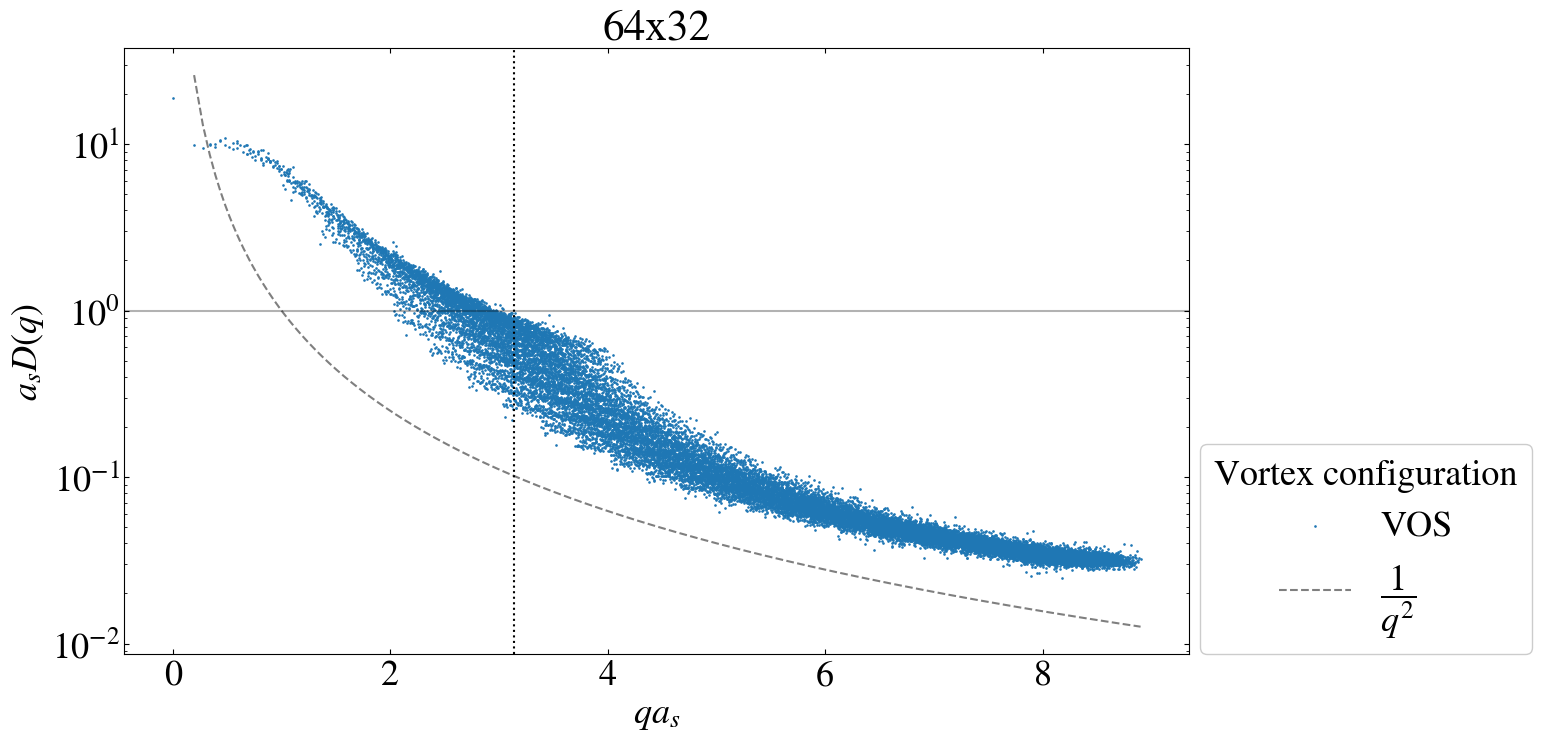

In [17]:
plt.figure(figsize=(16,8))
ax = plt.gca()

for pos,mode in enumerate(results.keys()):
    q = results[mode]['q'].copy()
    q = np.asarray([np.linalg.norm(qi * np.asarray([XI,1,1,1])) for qi in q])
    D = results[mode]['D'].copy()
    
    mu = q[renorm_mu]
        
    if mode in ["VRS","UT"]:
        Z = renorm(q[q>np.pi],D[q>np.pi],1/(q[q>np.pi]**2))
    else: Z = 1
    
    print(mode,Z)
    
    D *= Z
    
    label = f"{mode}"
    
    ax.scatter(q,np.asarray([d.mean for d in D]),label=label,ls='-',s=0.8)
        
ax.axvline(np.pi,0,1,ls=':',c='k')
ax.axhline(1,0,1,c='k',alpha=0.3)

sort = np.argsort(q)

ax.plot(q[sort],1/q[sort]**2,ls='--',c='k',alpha=0.5,label="$\dfrac{1}{q^2}$")

plt.title(f"{Nt}x32")    
plt.legend(loc=(1.01,0),title='Vortex configuration')
plt.ylabel('$a_sD(q)$')
#plt.yticks([])
plt.xlabel('$qa_s$')
#plt.ylim(0,6)
plt.yscale('log')

0.409(38) 1


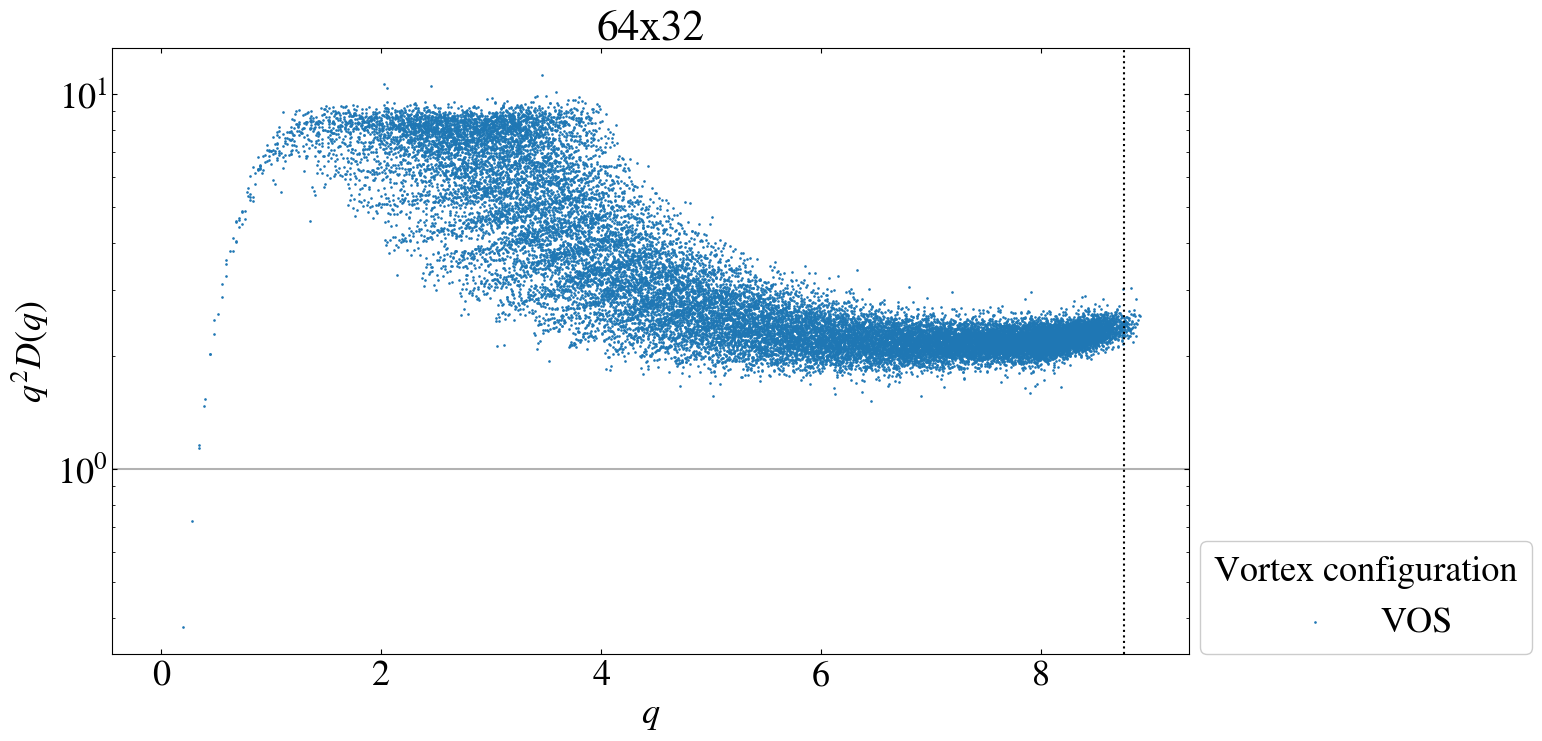

In [15]:
plt.figure(figsize=(16,8))
ax = plt.gca()

for pos,mode in enumerate(results.keys()):
    q = results[mode]['q'].copy()
    q = np.asarray([np.linalg.norm(qi[:] * np.asarray([XI,1,1,1])) for qi in q])
    D = results[mode]['D'].copy()
    
    mu = q[renorm_mu]
    
    Z_naive = 1/(D[renorm_mu]*mu**2)
    if mode in ["VRS","UT"]:
        Z_fit = renorm(q[q>np.pi],D[q>np.pi],1/(q[q>np.pi]**2))
    else: Z_fit = 1
    
    print(Z_naive,Z_fit)
    
    D *= Z_fit
    
    label = f"{mode}"
    
    ax.scatter(q,q**2*np.asarray([d.mean for d in D]),label=label,ls='-',s=0.8)
        
ax.axvline(mu,0,1,ls=':',c='k')
ax.axhline(1,0,1,c='k',alpha=0.3)

sort = np.argsort(q)

#ax.plot(q[sort],1/q[sort]**2,ls=':',c='k')

plt.title(f"{Nt}x32")    
plt.legend(loc=(1.01,0),title='Vortex configuration')
plt.ylabel('$q^2D(q)$')
#plt.yticks([])
plt.xlabel('$q$')
#plt.ylim(0,6)
plt.yscale('log')

KeyError: 'FULL'

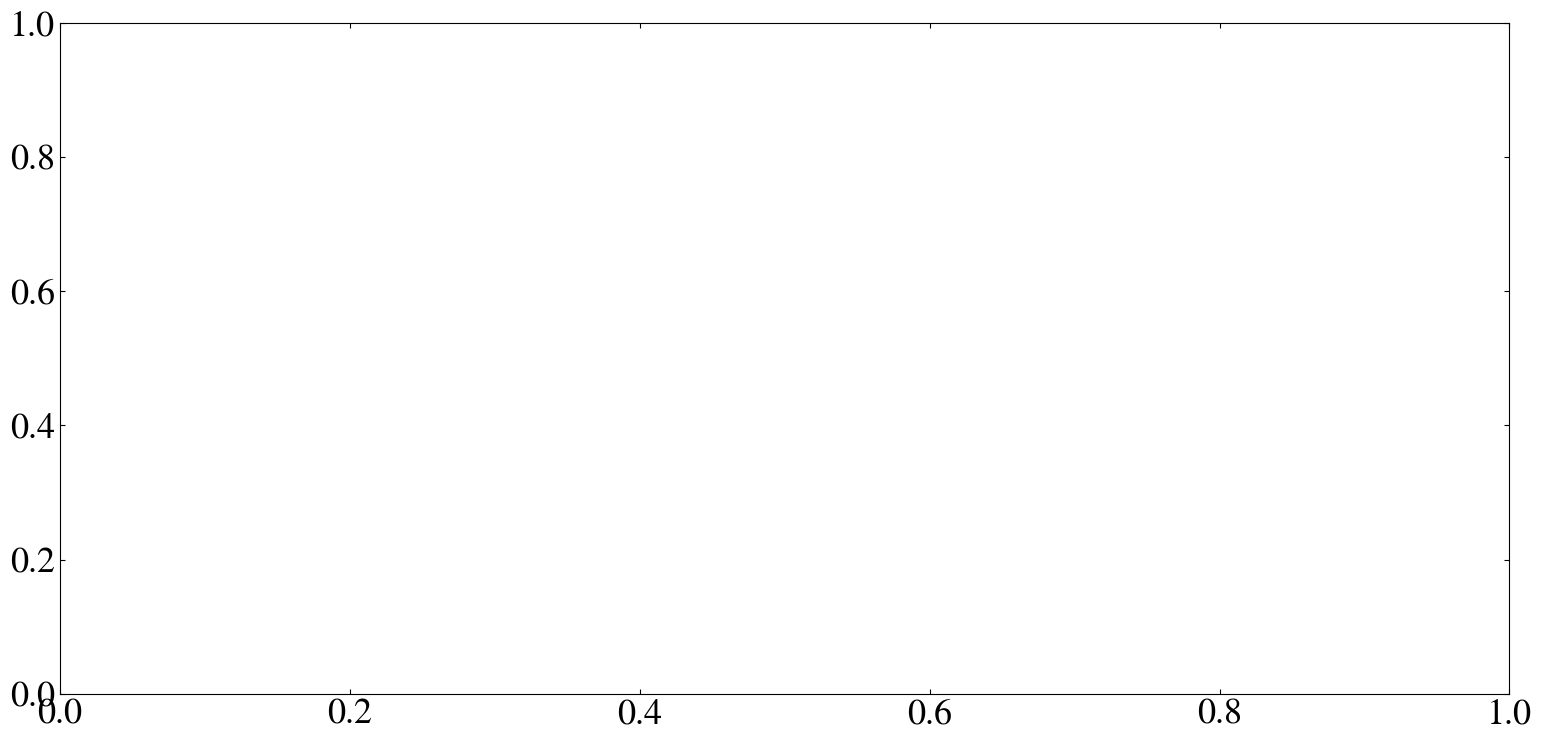

In [11]:
def linear_combfit(x,a,b):
    vrs_D = np.asarray([d.mean for d in results["VRS"]['f'].copy()])
    vos_D = np.asarray([d.mean for d in results["VOS"]['f'].copy()])

    return a*vrs_D + b*vos_D

plt.figure(figsize=(16,8))
ax = plt.gca()


q = results["FULL"]['q'].copy()
q = np.asarray([np.linalg.norm(qi[1:]) for qi in q[q[:,0]==0][1:]])
D = results["FULL"]['f'].copy()
    
mu = q[renorm_mu]
    
Z = 1/(D[renorm_mu]*mu*2)

D *= Z

popt, pcov = so.curve_fit(linear_combfit,q,np.asarray([d.mean for d in D]),sigma=np.asarray([d.mean for d in D]),absolute_sigma=True)

print(popt)
label = f"{mode}"
    
ax.scatter(q,np.asarray([d.mean for d in D]),label=label,ls='-')

ax.scatter(q,linear_combfit(q,*popt),c='lightblue')

ax.axvline(mu,0,1,ls=':',c='k')
ax.axhline(1/(2*mu),0,1,c='k',alpha=0.3)

plt.title(f"{Nt}x32")    
plt.legend(loc=(1.01,0),title='Vortex configuration')
plt.ylabel('$D(|p|)$')
#plt.yticks([])
plt.xlabel('$|p|$')
#plt.ylim(0,6)
#plt.yscale('log')

# Compare temperatures

In [12]:
mode = "UT"

In [15]:
results = {}

#for Nt in [8, 12, 16, 24, 32,64]: 
for Nt in [8,12,16,24,32,64]:
    try:
        prop = view_gluon.propagator(Nt,mode,n_samples=10,gtype="landau")
    except: continue
    print(Nt,len(prop.prop_info))
    
    q = prop.q
    D = prop.D
    
    # Z3 average
    qz3, Dz3, D4z3 = prop.Z3_average(q,D)
    
    # _,_ = prop.half_cut()
    
    prop.q = qz3
    prop.D = Dz3
    prop.D4 = D4z3
    
    qn = prop.norm_q()
    
    prop.q = qn
    
    # Cone cut
    qc, Dc, D4c = prop.cone_cut(radius=1)
    
    # Lattice momentum correction
    qi = prop.correct_q(qc,qtype="improved")
    
    # Renormalize
    #prop.renormalize(xi=3.453)
    
    results[Nt] = {'D4':prop.D4.copy(), 'D': prop.D.copy(),'q':qi, 'Nconf':len(prop.prop_info),'prop_info': prop.prop_info}


8 10
16 10
24 10
64 10


(2413,) (2413,)
(6528,) (6528,)


/tmp/ipykernel_881135/1843549523.py:13: RuntimeWarning: divide by zero encountered in divide
  D_tree = 1/(q**2)


(9792,) (9792,)
(26112,) (26112,)


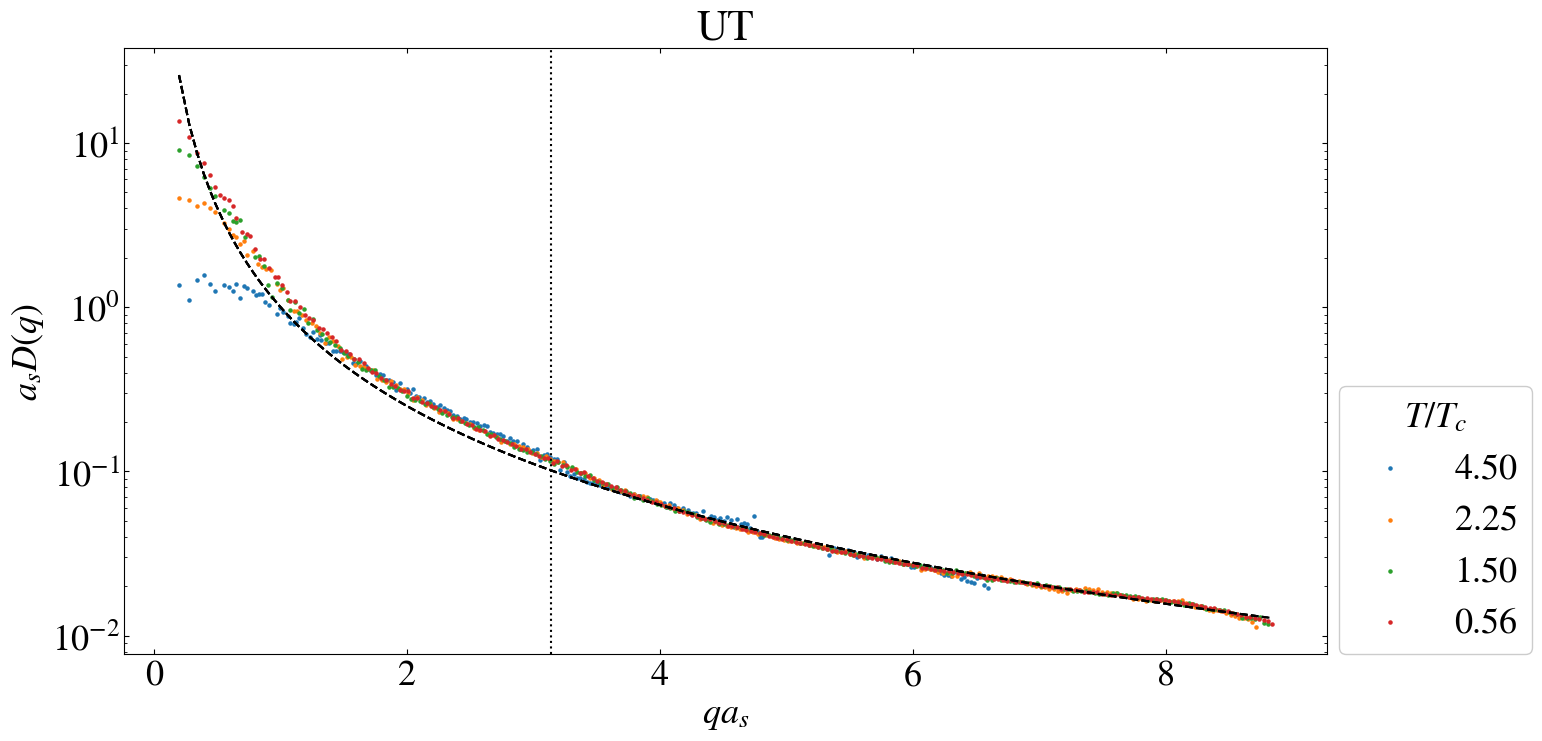

In [30]:
plt.figure(figsize=(16,8))
ax = plt.gca()

renorm_mu = -50

for pos,Nt in enumerate(results.keys()):
    q = results[Nt]['q'].copy()
    q = np.asarray([np.linalg.norm(qi * np.asarray([XI,1,1,1])) for qi in q])
    D = results[Nt]['D'].copy()
    
    print(q.shape,D.shape)
    
    D_tree = 1/(q**2)
    
    Z_fit = renorm(q[q>np.pi],D[q>np.pi],D_tree[q>np.pi])
    
    D *= Z_fit
    
    label = f"{36/Nt:.2f}"
    
    q_avg = []
    D_avg = []
    D4_avg = []
    
    q_pos = 0
    dq = max(q)/250
        
    while q_pos+dq < max(q):
        mask = np.logical_and(q > q_pos, q< q_pos+dq)
        if sum(mask) != 0:

            q_avg.append(np.mean(q[mask]))
            D_avg.append(np.median(D[mask]))
        
        q_pos += dq
    q = np.asarray(q_avg)
    D = np.asarray(D_avg)
    
    ax.scatter(q,np.asarray([d.mean for d in D]),label=label,ls='-',s=5)
    #ax.errorbar(q+0.01*pos,np.asarray([d.mean for d in D]),np.asarray([d.sdev for d in D]),label=label,ls='',errorevery=4,)
    
    if mode in ["UT","VR","VRS"]:
        sort = np.argsort(q)
        ax.plot(q[sort],1/q[sort]**2,c='k',ls='--')
    
ax.axvline(np.pi,0,1,ls=':',c='k')

plt.title(f"{mode}")    
plt.legend(loc=(1.01,0),title='$T/T_c$')
plt.ylabel('$a_sD(q)$')
#plt.yticks([])
plt.xlabel('$qa_s$')
#plt.ylim(0,1)
plt.yscale('log')

(2413,) (2413,)
(6528,) (6528,)


/tmp/ipykernel_881135/1656923705.py:13: RuntimeWarning: divide by zero encountered in divide
  D_tree = 1/(q**2)


(9792,) (9792,)
(26112,) (26112,)


Text(0.5, 0, '$qa_s$')

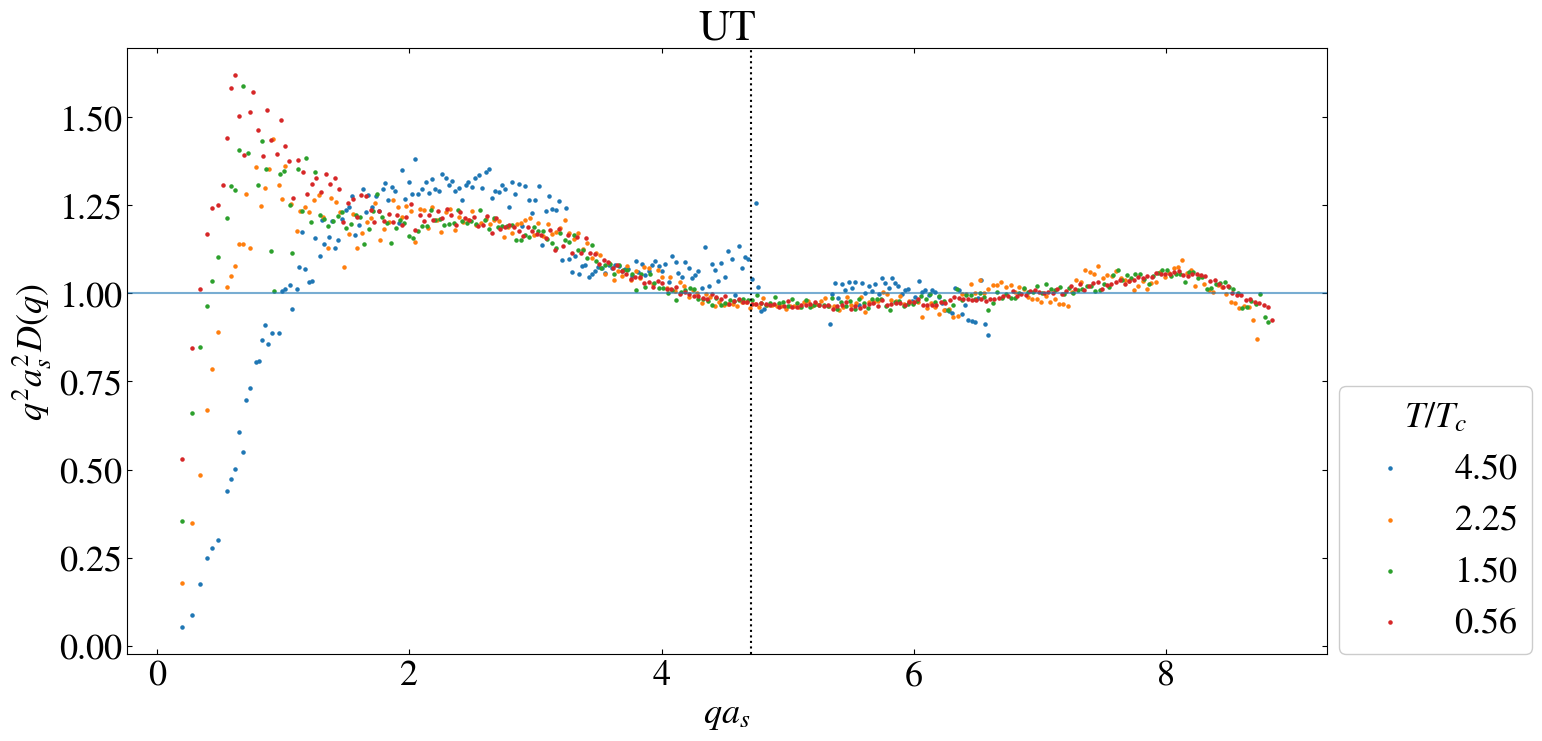

In [29]:
plt.figure(figsize=(16,8))
ax = plt.gca()

renorm_mu = -50

for pos,Nt in enumerate(results.keys()):
    q = results[Nt]['q'].copy()
    q = np.asarray([np.linalg.norm(qi * np.asarray([XI,1,1,1])) for qi in q])
    D = results[Nt]['D'].copy()
    
    print(q.shape,D.shape)
    
    D_tree = 1/(q**2)
    
    Z_fit = renorm(q[q>np.pi],D[q>1.5*np.pi],D_tree[q>1.5*np.pi])
    
    D *= Z_fit
    
    label = f"{36/Nt:.2f}"
    
    q_avg = []
    D_avg = []
    D4_avg = []
    
    q_pos = 0
    dq = max(q)/250
        
    while q_pos+dq < max(q):
        mask = np.logical_and(q > q_pos, q< q_pos+dq)
        if sum(mask) != 0:

            q_avg.append(np.mean(q[mask]))
            D_avg.append(np.median(D[mask]))
        
        q_pos += dq
    q = np.asarray(q_avg)
    D = np.asarray(D_avg)
    
    ax.scatter(q,q**2*np.asarray([d.mean for d in D]),label=label,ls='-',s=5)
    #ax.errorbar(q+0.01*pos,q**2*np.asarray([d.mean for d in D]),q**2*np.asarray([d.sdev for d in D]),label=label,ls='',errorevery=4,)
    
ax.axvline(1.5*np.pi,0,1,ls=':',c='k')
ax.axhline(1,0,1,alpha=0.6)

plt.title(f"{mode}")    
plt.legend(loc=(1.01,0),title='$T/T_c$')
plt.ylabel('$q^2a_s^2D(q)$')
#plt.yticks([])
plt.xlabel('$qa_s$')
#plt.ylim(0,1)

In [ ]:
plt.figure(figsize=(16,8))
ax = plt.gca()

renorm_mu = -50

for pos,Nt in enumerate(results.keys()):
    q = results[Nt]['q'].copy()
    q = np.asarray([np.linalg.norm(qi[1:]) for qi in q[q[:,0]==0][1:]])
    D = results[Nt]['f'].copy()
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu*2)
    
    D *= Z
    
    label = f"{36/Nt:.2f}"
    
    ax.scatter(q,2*q*np.asarray([d.mean for d in D]),label=label,ls='-')
    #ax.errorbar(q+0.01*pos,np.asarray([d.mean for d in D]),np.asarray([d.sdev for d in D]),label=label,ls='',errorevery=4,)
        
ax.axvline(mu,0,1,ls=':',c='k')
ax.axhline(1,0,1,c='k',alpha=0.3)

plt.title(f"{mode}")    
plt.legend(loc=(1.01,0),title='$T/T_c$')
plt.ylabel('$D(|p|)$')
#plt.yticks([])
plt.xlabel('$|p|$')
#plt.ylim(0,6)
#plt.yscale('log')

In [ ]:
import scipy.optimize as so

In [ ]:
def vo_fit(x,Z,M,b):
    return Z*x/np.sqrt(x**4 + M**4)

def gauss(x,Z,mu,sigma):
    return Z*np.exp(-0.5*((x-mu)/sigma)**2)

In [ ]:
plt.figure(figsize=(16,8))
ax = plt.gca()

renorm_mu = -10

peak_loc = []

for pos,Nt in enumerate(results.keys()):
    q = results[Nt]['q'].copy()
    q = np.asarray([np.linalg.norm(qi[1:]) for qi in q[q[:,0]==0][1:]])
    D = results[Nt]['f'].copy()
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu*2)
    
    D *= Z
    
    label = f"{36/Nt:.2f}"
    
    cut = q < 1
    
    popt,pcov = so.curve_fit(gauss,q[cut],np.asarray([d.mean for d in D[cut]]),sigma=np.asarray([d.sdev for d in D[cut]]), absolute_sigma=True)
    print(Nt, popt)
    
    peak_loc.append(gv.gvar(popt[1],np.sqrt(np.diag(pcov)[1])))
    
    ax.scatter(q,np.asarray([d.mean for d in D]),label=label,ls='-')
    
    sort = np.argsort(q)
    
    ax.plot(q[sort],gauss(q[sort],*popt))
ax.axvline(mu,0,1,ls=':',c='k')
ax.axhline(1/(2*mu),0,1,c='k',alpha=0.3)

plt.title(f"{mode}")    
plt.legend(loc=(1.01,0),title='Vortex configuration')
plt.ylabel('$D(|p|)$')
#plt.yticks([])
plt.xlabel('$|p|$')
#pt.ylim(0,6)
#plt.yscale('log')

In [ ]:
plt.figure(figsize=(12,8))
plt.errorbar([36/Nt for Nt in results.keys()],[p.mean for p in peak_loc],[p.sdev for p in peak_loc])